In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns

In [27]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Feature scaling is a crucial step in machine learning that involves transforming the values of features or variables in a dataset to a similar scale. But in this case there is no need of feature scaling.

In [28]:
# #mapping
# df['species']=df['species'].map({"seltosa":0, "versicolor":1, "virginica":2})



# #The line df['species']=df['species'].map({"seltosa":0, "versicolor":1, "virginica":2}) 
# #       in Python performs three key operations on the species column of a Pandas DataFrame:

# '''
# Selection: It selects the species column from the DataFrame using df['species'].
# Transformation: It applies a mapping function, .map, to the selected column. This function takes each entry in the species column as input and transforms it based on a provided dictionary.
# Reassignment: It assigns the transformed values back to the original species column, essentially replacing the existing values with their mapped counterparts.
# Here's a breakdown of the specific dictionary used in the mapping:

# "seltosa":0: This maps any value in the species column that equals "seltosa" to the integer 0.
# "versicolor":1: Similarly, this maps any value equal to "versicolor" to 1.
# "virginica":2: Finally, any value equal to "virginica" is mapped to 2.
# In essence, this line performs label encoding on the species column, converting the categorical labels ("seltosa", "versicolor", "virginica")
# into numerical values (0, 1, 2) for easier numerical processing by machine learning algorithms.
# '''

In [30]:
#In Pandas, the iloc function's main use is for integer-based indexing
#      and selection of data within your DataFrame. This means you can access specific rows and 
#       columns based on their positions within the DataFrame, instead of relying on labels or names.

from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy')
classifier.fit(df.iloc[:,:-1], df.iloc[:,-1])
               
'''df.iloc[:,:-1]: This selects all rows and columns in the DataFrame df except the last column.
:, used twice, indicates "all rows" in both axes. :,:-1 represents "all columns except the last".
df.iloc[:,-1]: This selects only the last column of the DataFrame df. :, 
used again, means "all rows" and -1 refers to the last column.'''

'df.iloc[:,:-1]: This selects all rows and columns in the DataFrame df except the last column.\n:, used twice, indicates "all rows" in both axes. :,:-1 represents "all columns except the last".\ndf.iloc[:,-1]: This selects only the last column of the DataFrame df. :, \nused again, means "all rows" and -1 refers to the last column.'

In [31]:
classifier

DecisionTreeClassifier(criterion='entropy')

In [32]:
from sklearn import tree 

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\nentropy = 0.146\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'entropy = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\nentropy = 0.918\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[0] <= 6.95\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.4615384615384615

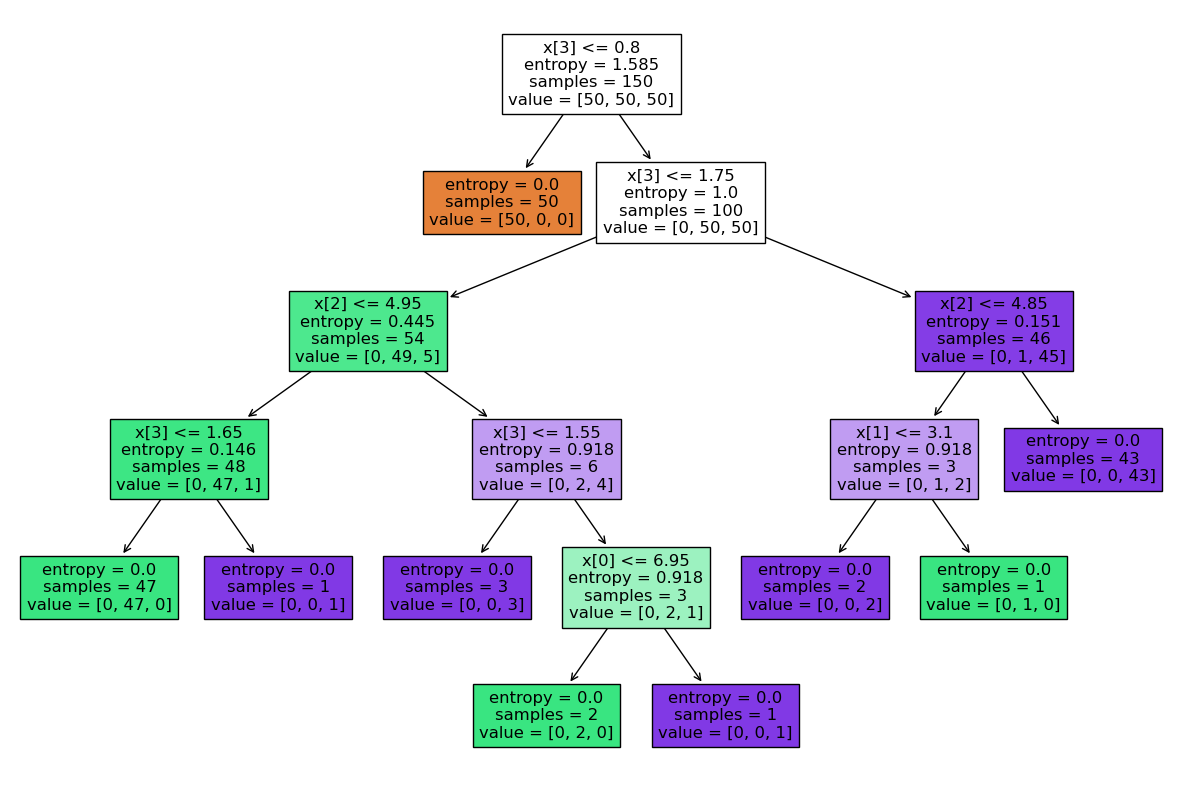

In [37]:
plt.figure(figsize=(15,10))                                    # use to give the size to the box
tree.plot_tree(classifier, filled=True)                       #filled give color to tyhe boxes
#tree is imported and '.plot_tree' is a function

above is an exampe of overfitting decision tree.

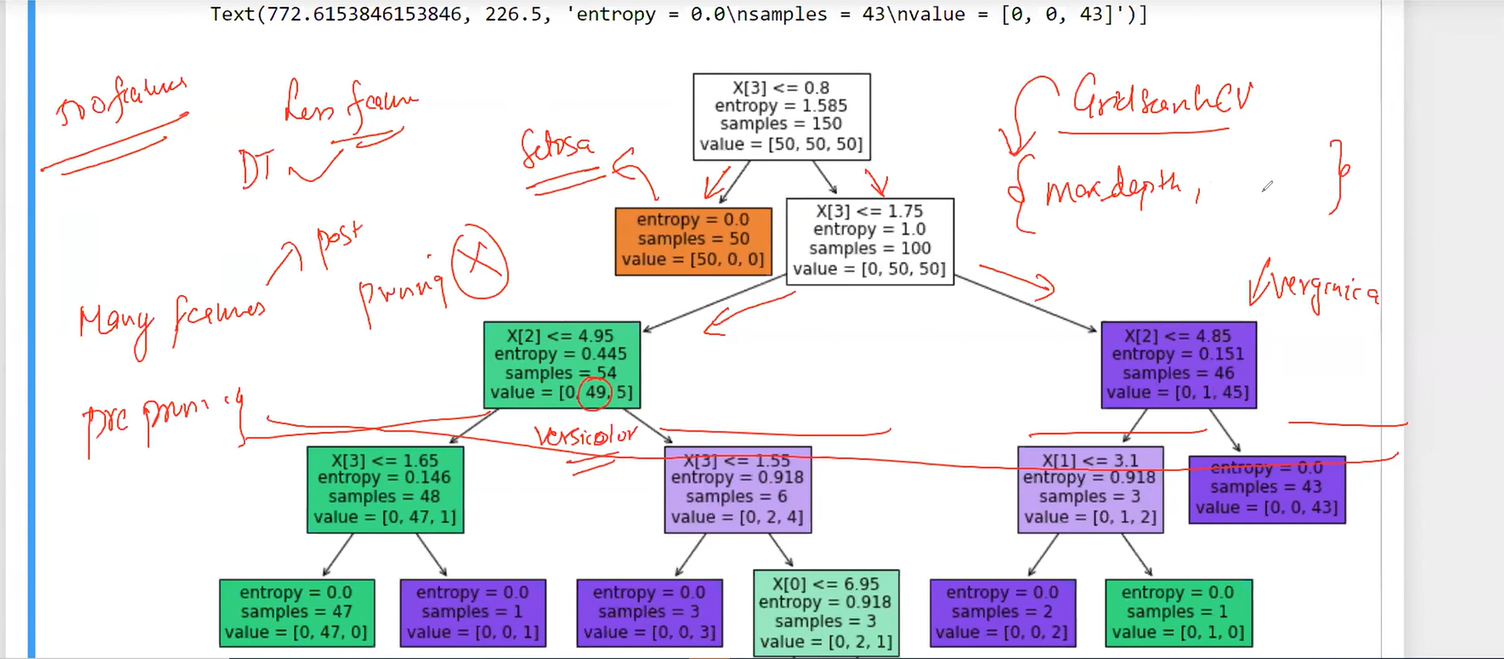

from the above picture, it's clealy visible that, we have less number of feature(iris dataset) and we use post prunning to overcome OVERFITTING.

In this case we must have tro use pre prunning, GridSearchCV, max depth, Cross val score etc. to reduce overfitting. So must have to use post punning when dataset is small.

[Text(0.375, 0.875, 'x[3] <= 0.8\nentropy = 1.585\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.25, 0.625, 'entropy = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.75\nentropy = 1.0\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.25, 0.375, 'x[2] <= 4.95\nentropy = 0.445\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.125, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.375, 'x[2] <= 4.85\nentropy = 0.151\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(0.625, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.125, '\n  (...)  \n')]

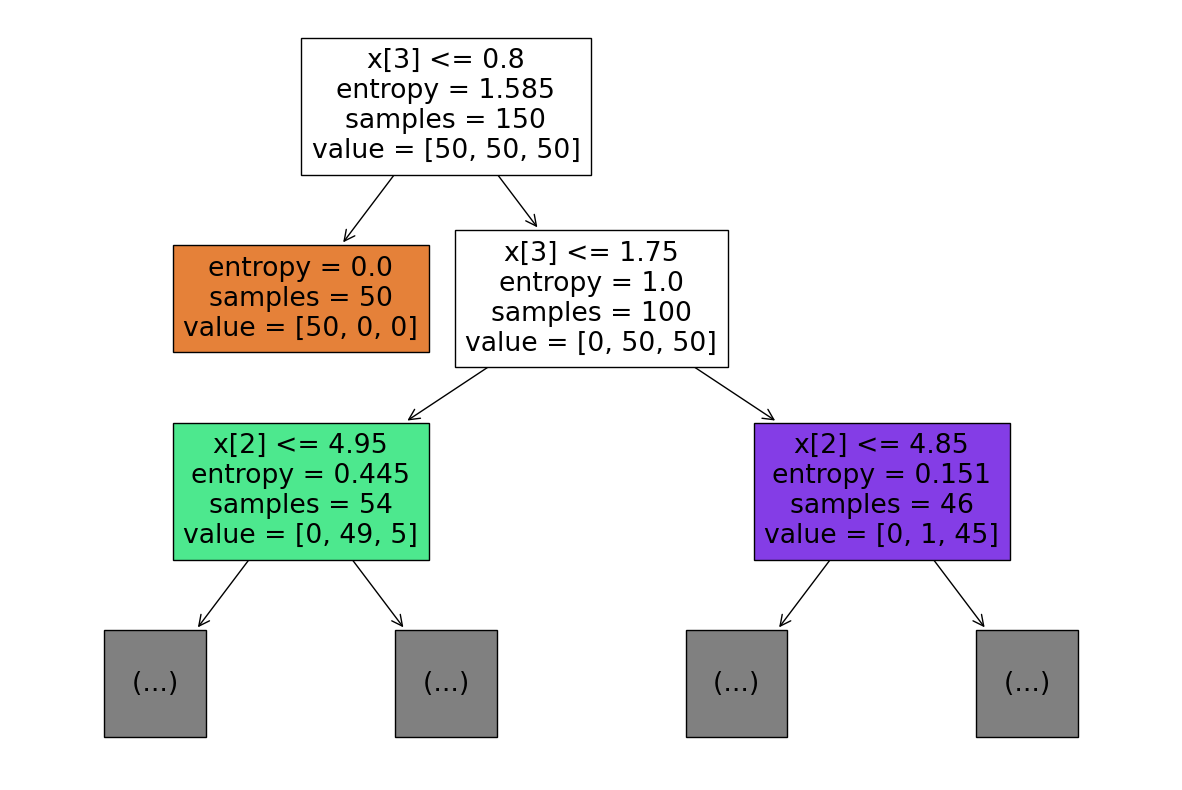

In [39]:
#max_depth

plt.figure(figsize=(15,10))                                    
tree.plot_tree(classifier, filled=True, max_depth=2)              #x[2]<=4.85

[Text(0.5, 0.9166666666666666, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[2] <= 5.45\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini 

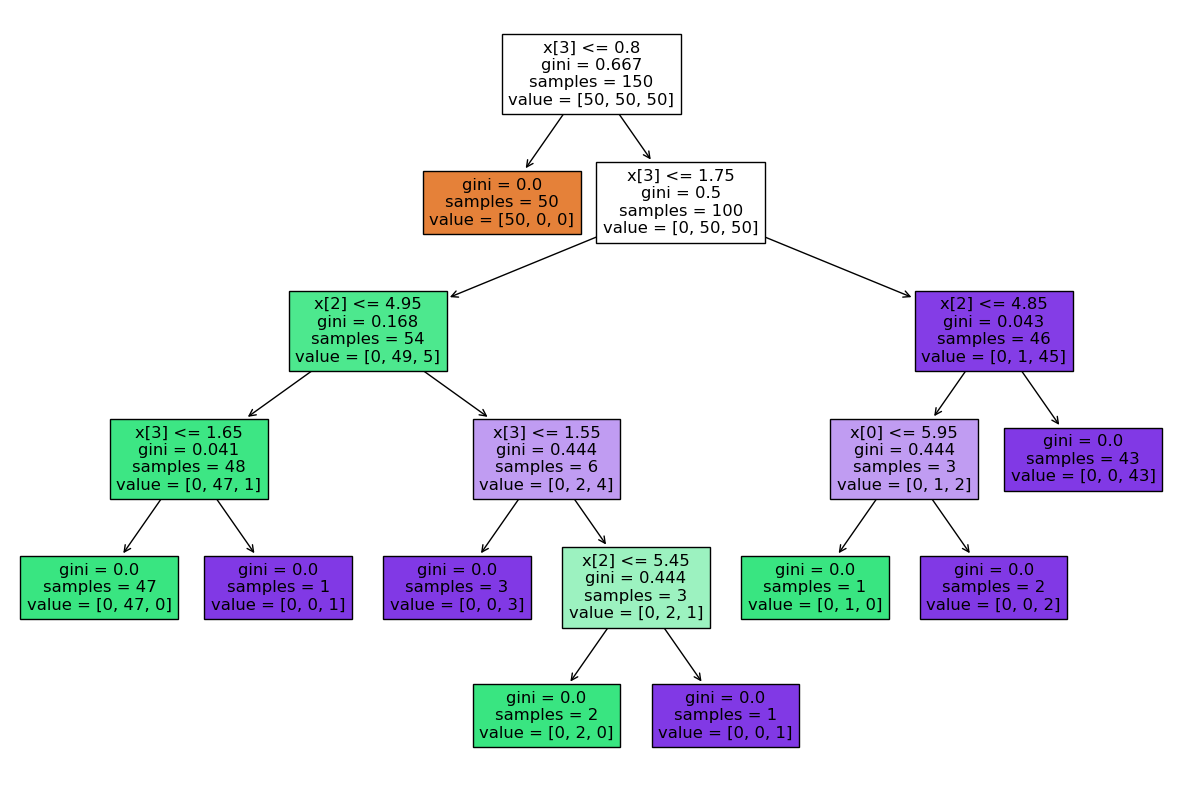

In [40]:
#with gini

classifier=DecisionTreeClassifier(criterion='gini')
classifier.fit(df.iloc[:,:-1], df.iloc[:,-1])

plt.figure(figsize=(15,10))            
tree.plot_tree(classifier, filled=True)

[Text(0.375, 0.875, 'x[3] <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5, 0.625, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.25, 0.375, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.125, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.375, 'x[2] <= 4.85\ngini = 0.043\nsamples = 46\nvalue = [0, 1, 45]'),
 Text(0.625, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.125, '\n  (...)  \n')]

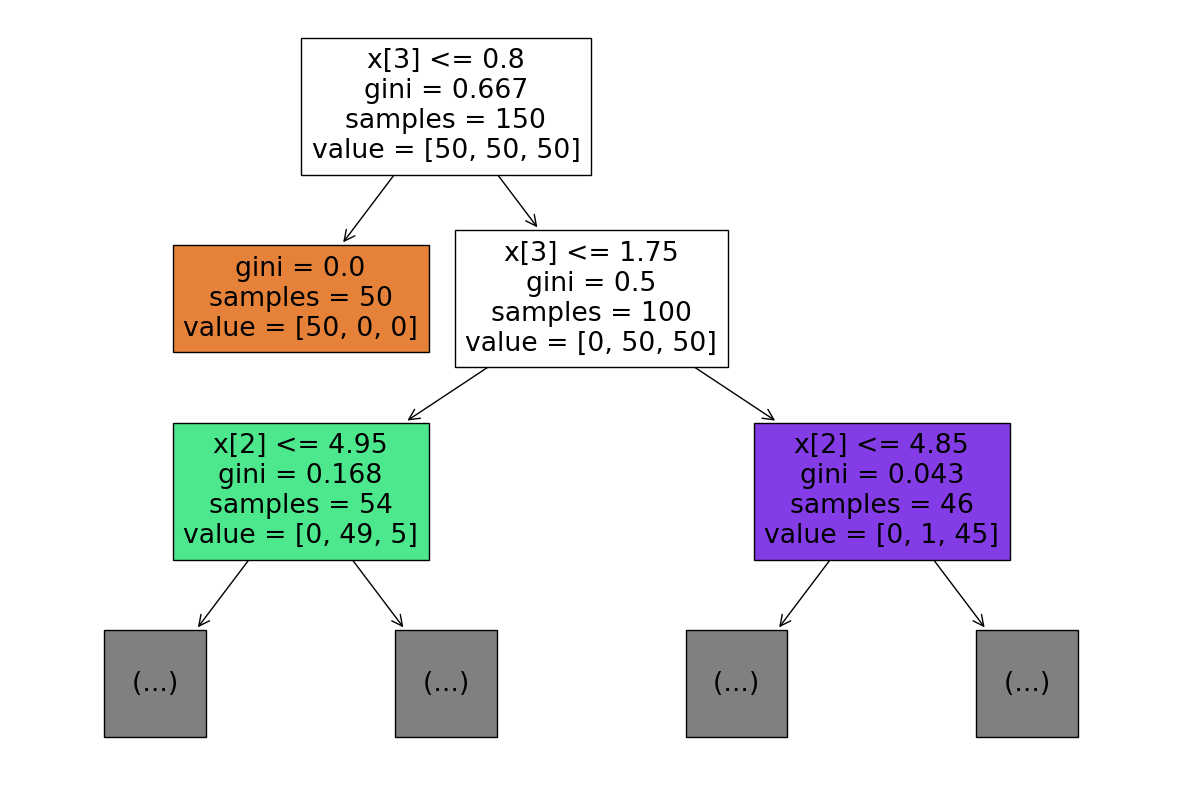

In [41]:
#gini+ max depth
classifier=DecisionTreeClassifier(criterion='gini')
classifier.fit(df.iloc[:,:-1], df.iloc[:,-1])

plt.figure(figsize=(15,10))            
tree.plot_tree(classifier, filled=True, max_depth=2)

In [52]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]  # The last column (species)

In [55]:
#prepunning to solve the above problem

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.model_selection import GridSearchCV
params = {'max_depth': [3, 4, 6, 8],  # Start from depth 3
          'min_samples_split': [2, 3],
          'min_samples_leaf': [1, 2]}  # Now valid


clf = tree.DecisionTreeClassifier()
gcv = GridSearchCV(estimator=clf, param_grid=params, cv=5)  # Add cross-validation
gcv.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 6, 8], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3]})